In [1]:

import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
#!pip install pywaffle
!#pip install --upgrade pip
#ip install squarify
import warnings
warnings.filterwarnings("ignore")

'#pip' is not recognized as an internal or external command,
operable program or batch file.


# Objecives:

1.find the most popular category
2.to find app with largest num of installs
3.to find app with largest size
    

In [2]:
#dataset=pd.read_csv('googleplaystore.csv')

In [3]:
#dataset.head()

In [4]:
df = pd.read_csv('googleplaystore.csv')
df.Installs = df.Installs.str.replace('+' , '')
df.Installs = df.Installs.str.replace(',' , '')
df.dropna(inplace = True) 
 


#dropping duplicates
df = df.drop_duplicates(subset='App', keep="first")

df.Installs = df.Installs.astype('float').astype('int')
df.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df1 = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()




Installing distribution by Category

<AxesSubplot:xlabel='Category'>

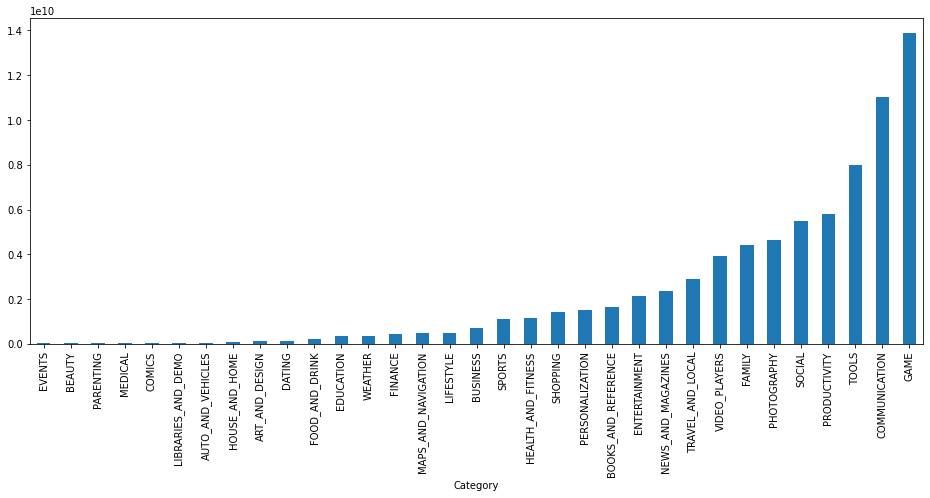

In [7]:
plt.figure(figsize=(16,6))
df.groupby(['Category'])['Installs'].sum().sort_values(ascending=True).plot(kind='bar')

In [8]:
dfp=df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()



## Inference

Out of all the categories 'GAME' has the most number of installations. number of installation is directly propotional to the App, hence Games is the popular category

In [9]:
   # converting into billions


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

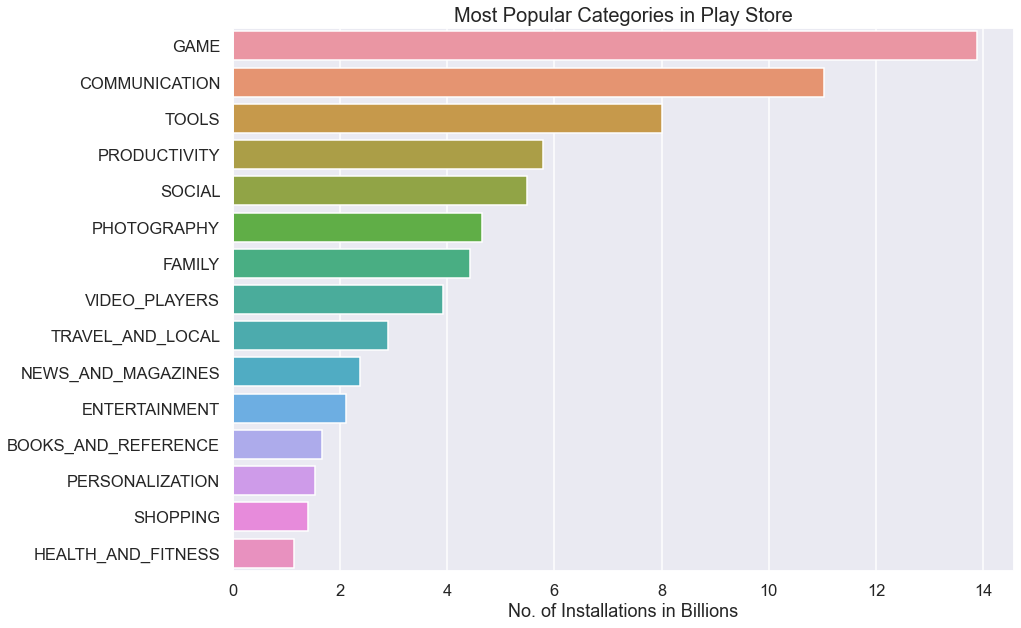

In [10]:
df1.Installs = df1.Installs/1000000000# converting into billions
df2 = df1.head(15)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")


ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)


with almost 14 Billion Installations **Game is the most popular Category in the play store

Text(0.5, 1.0, 'Least Popular categories Play Store ')

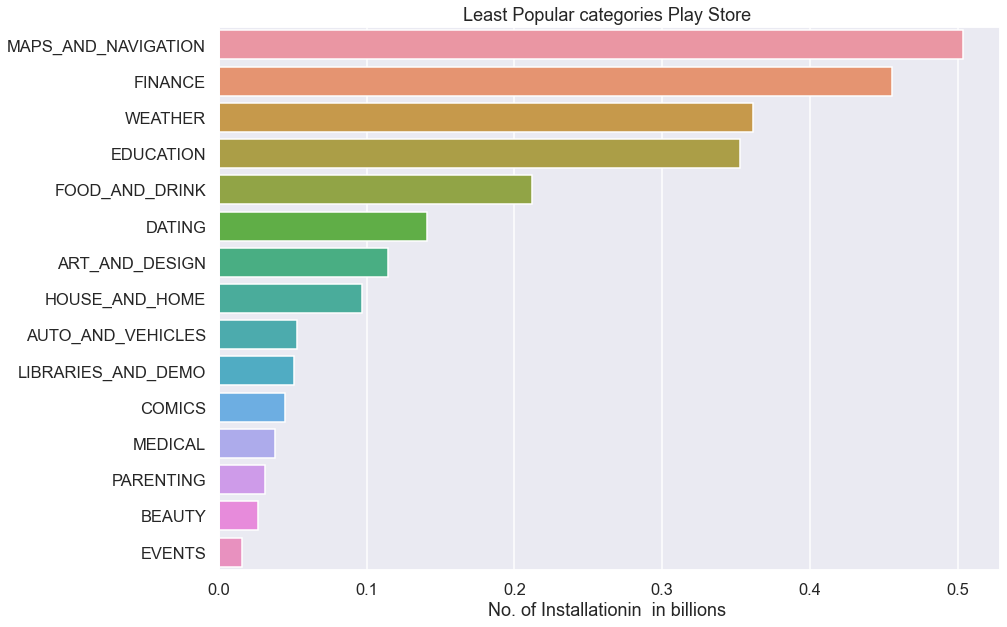

In [11]:
df3=df1.tail(15)
#sns.set_context('talk')
plt.figure(figsize=(14,10))
ax=sns.barplot(x='Installs', y='Category', data=df3)
ax.set_xlabel('No. of Installationin  in billions ')
ax.set_ylabel('')
ax.set_title('Least Popular categories Play Store ')

In [12]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### App with Largest number of installations

In [32]:
dfa=df.groupby(['Category', 'App'])['Installs'].sum().reset_index()

In [35]:
dfa=dfa.sort_values('Installs',ascending=False)

In [37]:
dftop=dfa[dfa['Installs']==1000000000]

In [38]:
dftop

,Category,App,Installs
7874,TRAVEL_AND_LOCAL,Google Street View,1000000000
6268,PRODUCTIVITY,Google Drive,1000000000
891,COMMUNICATION,WhatsApp Messenger,1000000000
779,COMMUNICATION,Google Chrome: Fast & Secure,1000000000
8106,VIDEO_PLAYERS,YouTube,1000000000
785,COMMUNICATION,Hangouts,1000000000
6696,SOCIAL,Instagram,1000000000
7904,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,1000000000
4087,GAME,Subway Surfers,1000000000
7465,TOOLS,Google,1000000000


In [43]:
df.groupby('App')['Installs'].sum().sort_values(ascending=False).sort_values(ascending=False)

App
Subway Surfers                   1000000000
Google Play Games                1000000000
Skype - free IM & video calls    1000000000
Google Drive                     1000000000
Google Chrome: Fast & Secure     1000000000
                                    ...    
Clinic Doctor EHr                         5
CZ-Help                                   5
Mu.F.O.                                   1
Ra Ga Ba                                  1
KBA-EZ Health Guide                       1
Name: Installs, Length: 8190, dtype: int32

### Application with Largest size

In [53]:
#df.groupby('App')['Size'].sum().sort_values(ascending=False)

In [68]:
size=df.groupby(['Category','App'])['Size'].sum().sort_values(ascending=False).reset_index()

In [69]:
size=size[size.Size!='Varies with device']

In [78]:
size.head(15)

,Category,App,Size
1169,GAME,My Talking Angela,99M
1170,FAMILY,Angry Birds Blast,99M
1171,FAMILY,Angry Birds POP Bubble Shooter,99M
1172,LIBRARIES_AND_DEMO,Chakra Cleansing,99M
1173,GAME,Arena of Valor: 5v5 Arena Game,99M
1174,FAMILY,BK Dinos,99M
1175,GAME,Gangster Town,99M
1176,GAME,Rope Hero: Vice Town,99M
1177,GAME,League of Stickman 2018- Ninja Arena PVP(Dream...,99M
1178,FAMILY,Exiled Kingdoms RPG,99M


### Applications with Rating 5.0

In [88]:
rating=df.groupby(['Category','Installs','App'])['Rating'].sum().sort_values(ascending=False).reset_index()

In [89]:
rating

,Category,Installs,App,Rating
0,ART_AND_DESIGN,100,Spring flowers theme couleurs d t space,5.0
1,FAMILY,1000,Fr. Daoud Lamei,5.0
2,FINANCE,100,DN Calculators,5.0
3,FINANCE,100,CF,5.0
4,FINANCE,100,BI APP,5.0
...,...,...,...,...
8185,TOOLS,50,DT future1 cam,1.0
8186,PRODUCTIVITY,100,Thistletown CI,1.0
8187,GAME,1000,BJ Bridge Standard American 2018,1.0
8188,FAMILY,1000,FE Mechanical Engineering Prep,1.0


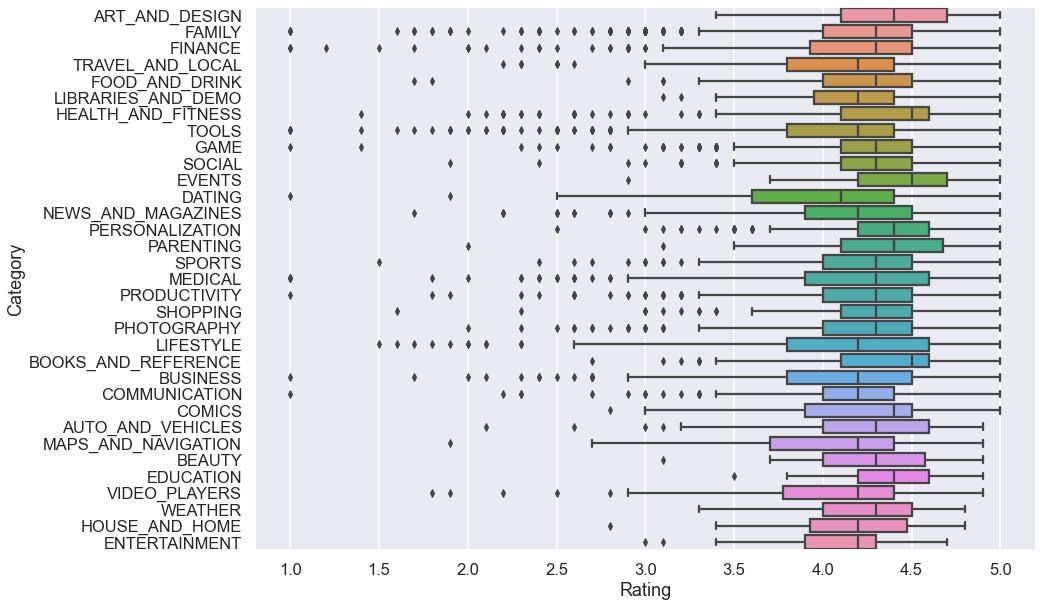

In [90]:
plt.figure(figsize=(14,10))


ax=sns.boxplot(x='Rating',y='Category', data=rating)